In [3]:
!ls ../examples

Basemap.ipynb	 Geos_Sqlite3_Data.ipynb  K3D.db  Storm-Data.ipynb
GEOS_Data.ipynb  K3D_Data.png		  pub	  Storm-images.ipynb


/usr/local/lib/python3.4/dist-packages/mpl_toolkits/basemap/__init__.py:1699: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch


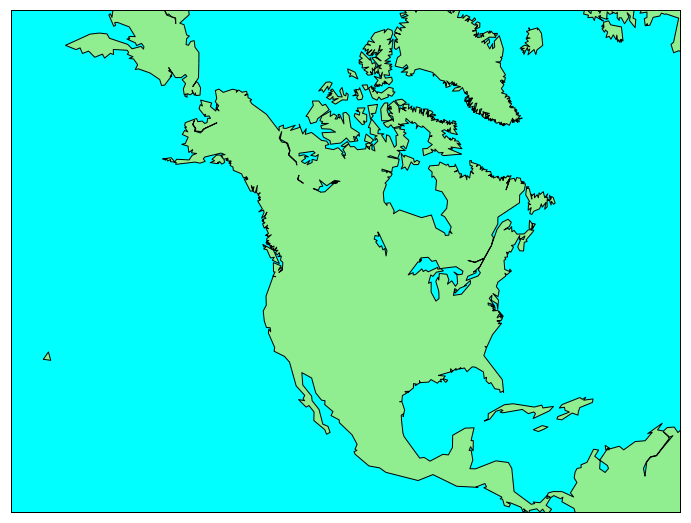

In [4]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,12))
# setup Lambert Conformal basemap.
m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution='c',lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
# draw coastlines.
m.drawcoastlines()
# draw a boundary around the map, fill the background.
# this background will end up being the ocean color, since
# the continents will be drawn on top.
m.drawmapboundary(fill_color='aqua')
# fill continents, set lake color same as ocean color.
m.fillcontinents(color='lightgreen',lake_color='aqua')
plt.savefig('GEOS_Data.png')

plt.show()


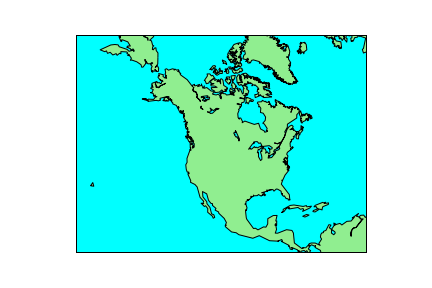

In [6]:
from PIL import Image
im = Image.open("GEOS_Data.png")
im

/usr/local/lib/python3.4/dist-packages/mpl_toolkits/basemap/__init__.py:1699: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch


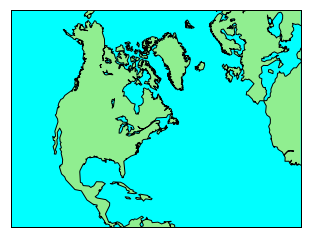

In [7]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline
# setup Lambert Conformal basemap.
m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution='c',lat_1=25.,lat_2=80,lat_0=50,lon_0=-67.)
# draw coastlines.
m.drawcoastlines()
# draw a boundary around the map, fill the background.
# this background will end up being the ocean color, since
# the continents will be drawn on top.
m.drawmapboundary(fill_color='aqua')
# fill continents, set lake color same as ocean color.
m.fillcontinents(color='lightgreen',lake_color='aqua')
plt.show()


In [8]:
!ls ../

examples     history.txt  __init__.py  K3D.db	    storms
GeosData.py  index.ipynb  JAVA	       __pycache__


In [9]:
!ls ../storms

StormEvents_locations-ftp_v1.0_d1950_c20170120.csv
StormEvents_locations-ftp_v1.0_d1951_c20160223.csv
StormEvents_locations-ftp_v1.0_d1952_c20170619.csv
StormEvents_locations-ftp_v1.0_d1953_c20160223.csv
StormEvents_locations-ftp_v1.0_d1954_c20160223.csv
StormEvents_locations-ftp_v1.0_d1955_c20160223.csv
StormEvents_locations-ftp_v1.0_d1956_c20170717.csv
StormEvents_locations-ftp_v1.0_d1957_c20160223.csv
StormEvents_locations-ftp_v1.0_d1958_c20160223.csv
StormEvents_locations-ftp_v1.0_d1959_c20160223.csv
StormEvents_locations-ftp_v1.0_d1960_c20160223.csv
StormEvents_locations-ftp_v1.0_d1961_c20160223.csv
StormEvents_locations-ftp_v1.0_d1962_c20160223.csv
StormEvents_locations-ftp_v1.0_d1963_c20160223.csv
StormEvents_locations-ftp_v1.0_d1964_c20160223.csv
StormEvents_locations-ftp_v1.0_d1965_c20170619.csv
StormEvents_locations-ftp_v1.0_d1966_c20160223.csv
StormEvents_locations-ftp_v1.0_d1967_c20160223.csv
StormEvents_locations-ftp_v1.0_d1968_c20160223.csv
StormEvents_locations-ftp_v1.0_

# View some latitudes and longitudes

In [ ]:
m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution='c',lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)

/usr/local/lib/python3.4/dist-packages/mpl_toolkits/basemap/__init__.py:1699: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/usr/local/lib/python3.4/dist-packages/mpl_toolkits/basemap/__init__.py:3224: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/local/lib/python3.4/dist-packages/mpl_toolkits/basemap/__init__.py:3233: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


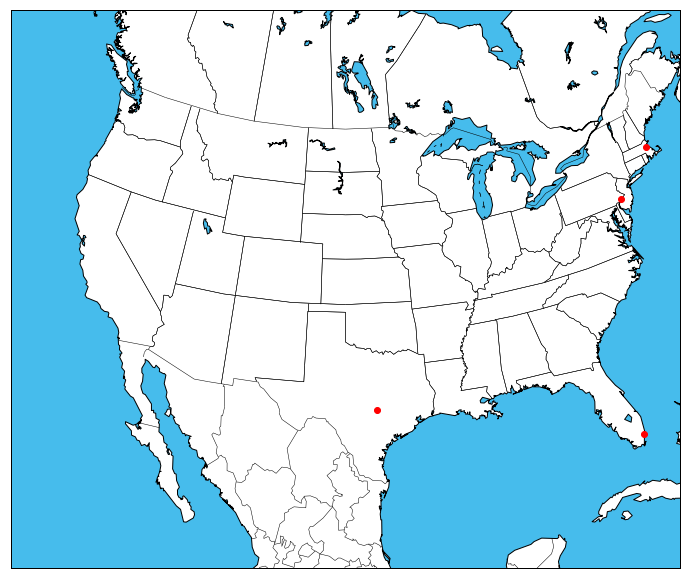

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import pandas as pd
import io
plt.figure(figsize=(12,12))

u = u"""latitude,longitude
42.357778,-71.059444
39.952222,-75.163889
25.787778,-80.224167
30.267222, -97.763889"""

# read in data to use for plotted points
buildingdf = pd.read_csv(io.StringIO(u), delimiter=",")
lat = buildingdf['latitude'].values
lon = buildingdf['longitude'].values

# determine range to print based on min, max lat and lon of the data
margin = 2 # buffer to add to the range
lat_min = min(lat) - margin
lat_max = max(lat) + margin
lon_min = min(lon) - margin
lon_max = max(lon) + margin

# create map using BASEMAP
"""
m = Basemap(llcrnrlon=lon_min,
            llcrnrlat=lat_min,
            urcrnrlon=lon_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(lon_max-lon_min)/2,
            projection='merc',
            resolution = 'h',
            area_thresh=10000.,
            )
"""
m = Basemap(width=6000000,height=5000000,projection='lcc',
            resolution='l',lat_1=85.,lat_2=85,lat_0=38,lon_0=-100.)
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color = 'white',lake_color='#46bcec')
# convert lat and lon to map projection coordinates
lons, lats = m(lon, lat)
# plot points as red dots
m.scatter(lons, lats, marker = 'o', color='r', zorder=5)
plt.show()

/usr/local/lib/python3.4/dist-packages/mpl_toolkits/basemap/__init__.py:3298: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/local/lib/python3.4/dist-packages/mpl_toolkits/basemap/__init__.py:3307: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/usr/local/lib/python3.4/dist-packages/mpl_toolkits/basemap/__init__.py:3224: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/local/lib/python3.4/dist-packages/mpl_toolkits/basemap/__init__.py:3233: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


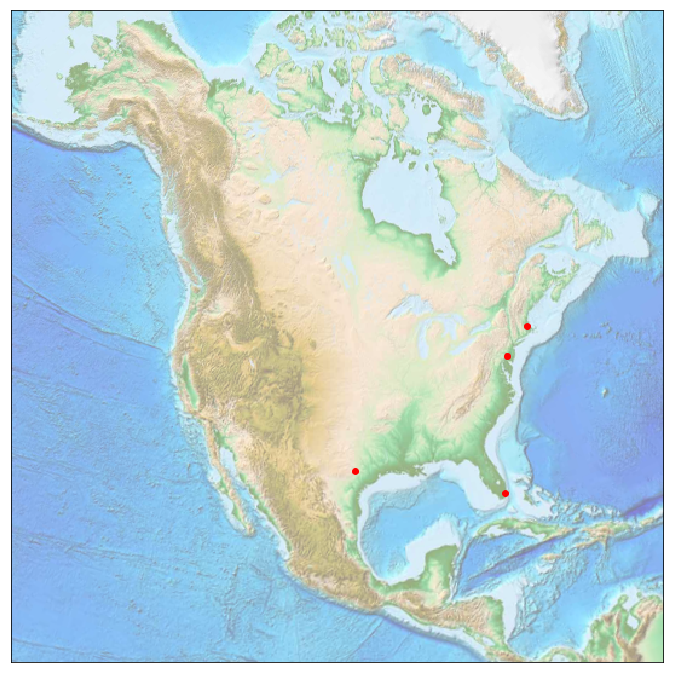

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.basemap import Basemap
#fig = plt.figure(figsize=(12, 12))
plt.figure(figsize=(12,12))

u = u"""latitude,longitude
42.357778,-71.059444
39.952222,-75.163889
25.787778,-80.224167
30.267222, -97.763889"""

# read in data to use for plotted points
buildingdf = pd.read_csv(io.StringIO(u), delimiter=",")
lat = buildingdf['latitude'].values
lon = buildingdf['longitude'].values




m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=8E6, 
            lat_0=45, lon_0=-100,)
m.etopo(scale=0.5, alpha=0.5)



lons, lats = m(lon, lat)
# plot points as red dots
m.scatter(lons, lats, marker = 'o', color='r', zorder=5)


# Map (long, lat) to (x, y) for plotting
#x, y = m(-122.3, 47.6)
#plt.plot(x, y, 'ok', markersize=5)
#plt.text(x, y, ' Seattle', fontsize=12);

/usr/local/lib/python3.4/dist-packages/mpl_toolkits/basemap/__init__.py:3298: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/local/lib/python3.4/dist-packages/mpl_toolkits/basemap/__init__.py:3307: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


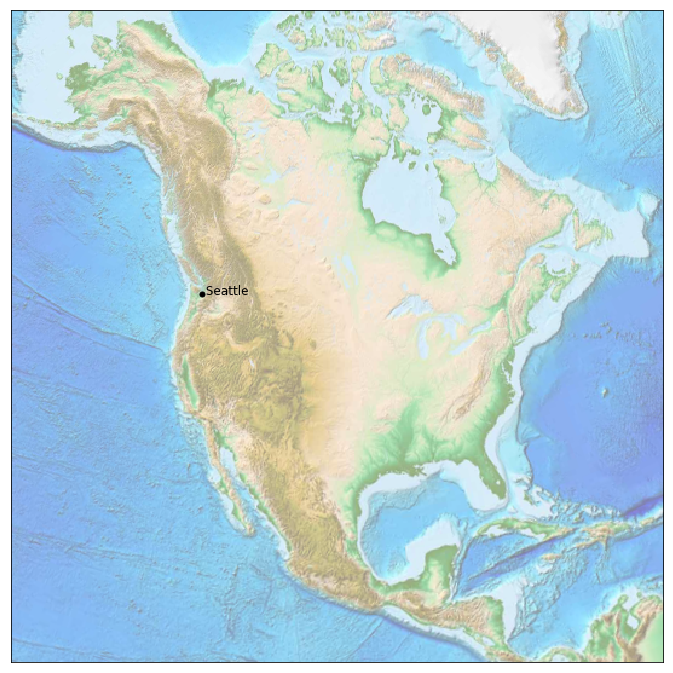

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.basemap import Basemap
fig = plt.figure(figsize=(12, 12))
m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=8E6, 
            lat_0=45, lon_0=-100,)
m.etopo(scale=0.5, alpha=0.5)

# Map (long, lat) to (x, y) for plotting
x, y = m(-122.3, 47.6)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, ' Seattle', fontsize=12);

/usr/local/lib/python3.4/dist-packages/mpl_toolkits/basemap/__init__.py:1699: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/usr/local/lib/python3.4/dist-packages/mpl_toolkits/basemap/__init__.py:3224: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/local/lib/python3.4/dist-packages/mpl_toolkits/basemap/__init__.py:3233: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


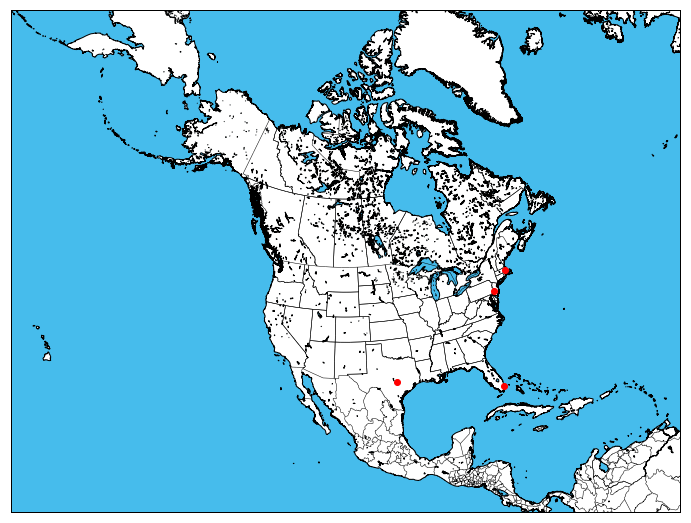

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import pandas as pd
import io
plt.figure(figsize=(12,12))

u = u"""latitude,longitude
42.357778,-71.059444
39.952222,-75.163889
25.787778,-80.224167
30.267222, -97.763889"""

# read in data to use for plotted points
buildingdf = pd.read_csv(io.StringIO(u), delimiter=",")
lat = buildingdf['latitude'].values
lon = buildingdf['longitude'].values

# determine range to print based on min, max lat and lon of the data
margin = 2 # buffer to add to the range
lat_min = min(lat) - margin
lat_max = max(lat) + margin
lon_min = min(lon) - margin
lon_max = max(lon) + margin

# create map using BASEMAP
"""
m = Basemap(llcrnrlon=lon_min,
            llcrnrlat=lat_min,
            urcrnrlon=lon_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(lon_max-lon_min)/2,
            projection='merc',
            resolution = 'h',
            area_thresh=10000.,
            )
"""
m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution='h',lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color = 'white',lake_color='#46bcec')
# convert lat and lon to map projection coordinates
lons, lats = m(lon, lat)
# plot points as red dots
m.scatter(lons, lats, marker = 'o', color='r', zorder=5)
plt.show()

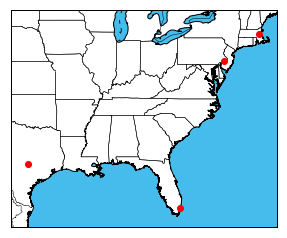

In [26]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd
import io

u = u"""latitude,longitude
42.357778,-71.059444
39.952222,-75.163889
25.787778,-80.224167
30.267222, -97.763889"""

# read in data to use for plotted points
buildingdf = pd.read_csv(io.StringIO(u), delimiter=",")
lat = buildingdf['latitude'].values
lon = buildingdf['longitude'].values

# determine range to print based on min, max lat and lon of the data
margin = 2 # buffer to add to the range
lat_min = min(lat) - margin
lat_max = max(lat) + margin
lon_min = min(lon) - margin
lon_max = max(lon) + margin

# create map using BASEMAP
"""
m = Basemap(llcrnrlon=lon_min,
            llcrnrlat=lat_min,
            urcrnrlon=lon_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(lon_max-lon_min)/2,
            projection='merc',
            resolution = 'h',
            area_thresh=10000.,
            )
"""

m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color = 'white',lake_color='#46bcec')
# convert lat and lon to map projection coordinates
lons, lats = m(lon, lat)
# plot points as red dots
m.scatter(lons, lats, marker = 'o', color='r', zorder=5)
plt.show()



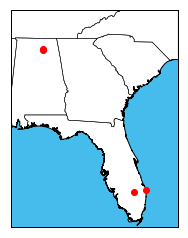

In [27]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd
import io

u = u"""latitude,longitude
34.44, -86.48
34.42, -86.46
26.82, -80.78
26.91, -80.07
"""

# read in data to use for plotted points
buildingdf = pd.read_csv(io.StringIO(u), delimiter=",")
lat = buildingdf['latitude'].values
lon = buildingdf['longitude'].values

# determine range to print based on min, max lat and lon of the data
margin = 2 # buffer to add to the range
lat_min = min(lat) - margin
lat_max = max(lat) + margin
lon_min = min(lon) - margin
lon_max = max(lon) + margin

# create map using BASEMAP
m = Basemap(llcrnrlon=lon_min,
            llcrnrlat=lat_min,
            urcrnrlon=lon_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(lon_max-lon_min)/2,
            projection='merc',
            resolution = 'h',
            area_thresh=10000.,
            )
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color = 'white',lake_color='#46bcec')
# convert lat and lon to map projection coordinates
lons, lats = m(lon, lat)
# plot points as red dots
m.scatter(lons, lats, marker = 'o', color='r', zorder=5)
plt.show()



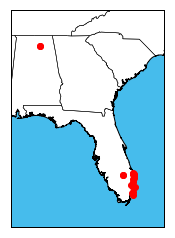

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import pandas as pd
import io

u = u"""latitude,longitude
34.44, -86.48
34.42, -86.46
26.82, -80.78
26.91, -80.07
25.58, -80.1
25.73, -80.16
25.76, -80.11
26.3714, -80.0853
26.09, -80.07
26.07, -79.95
26.82, -80.78
26.5848, -80.0683
26.8932, -80.0562
26.94, -80.07
26.9116, -80.0734
26.6128, -80.0362
26.77, -80.02
26.24, -80.25
"""

# read in data to use for plotted points
buildingdf = pd.read_csv(io.StringIO(u), delimiter=",")
lat = buildingdf['latitude'].values
lon = buildingdf['longitude'].values

# determine range to print based on min, max lat and lon of the data
margin = 2 # buffer to add to the range
lat_min = min(lat) - margin
lat_max = max(lat) + margin
lon_min = min(lon) - margin
lon_max = max(lon) + margin

# create map using BASEMAP
m = Basemap(llcrnrlon=lon_min,
            llcrnrlat=lat_min,
            urcrnrlon=lon_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(lon_max-lon_min)/2,
            projection='merc',
            resolution = 'h',
            area_thresh=10000.,
            )
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color = 'white',lake_color='#46bcec')
# convert lat and lon to map projection coordinates
lons, lats = m(lon, lat)
# plot points as red dots
m.scatter(lons, lats, marker = 'o', color='r', zorder=5)
plt.figure(figsize=(3,4), dpi=150)
plt.show()

In [ ]:
https://stackoverflow.com/questions/14827650/pyplot-scatter-plot-marker-size

/usr/local/lib/python3.4/dist-packages/mpl_toolkits/basemap/__init__.py:1699: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/usr/local/lib/python3.4/dist-packages/mpl_toolkits/basemap/__init__.py:3224: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/local/lib/python3.4/dist-packages/mpl_toolkits/basemap/__init__.py:3233: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


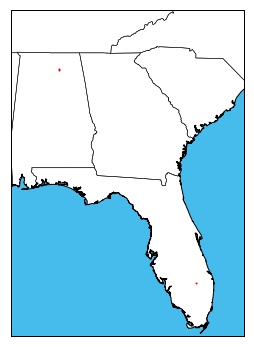

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import pandas as pd
import io

u = u"""latitude,longitude
34.44 , -86.48
34.42 , -86.46
26.82 , -80.78
"""
# read in data to use for plotted points
buildingdf = pd.read_csv(io.StringIO(u), delimiter=",")
lat = buildingdf['latitude'].values
lon = buildingdf['longitude'].values

# determine range to print based on min, max lat and lon of the data
margin = 2 # buffer to add to the range
lat_min = min(lat) - margin
lat_max = max(lat) + margin
lon_min = min(lon) - margin
lon_max = max(lon) + margin
plt.figure(figsize=(12,6), dpi = 150)
# create map using BASEMAP
m = Basemap(llcrnrlon=lon_min,
            llcrnrlat=lat_min,
            urcrnrlon=lon_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(lon_max-lon_min)/2,
            projection='merc',
            resolution = 'h',
            area_thresh=10000.,
            )
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color = 'white',lake_color='#46bcec')
# convert lat and lon to map projection coordinates
lons, lats = m(lon, lat)
# plot points as red dots
m.scatter(lons, lats, s = 1, marker = 'o', color='r', zorder=5)
#m.scatter(lons, lats, ".")
plt.savefig('foo.png')
plt.show()

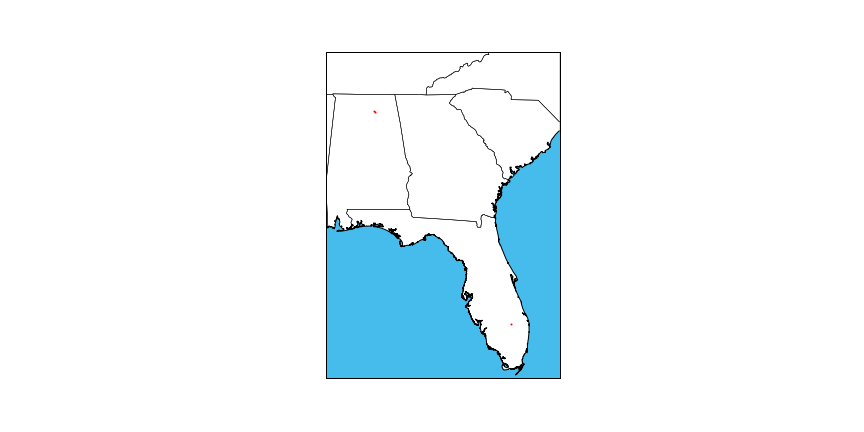

In [14]:
from PIL import Image
im = Image.open("foo.png")
im

/usr/local/lib/python3.4/dist-packages/mpl_toolkits/basemap/__init__.py:1699: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/usr/local/lib/python3.4/dist-packages/mpl_toolkits/basemap/__init__.py:3262: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/local/lib/python3.4/dist-packages/mpl_toolkits/basemap/__init__.py:3271: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


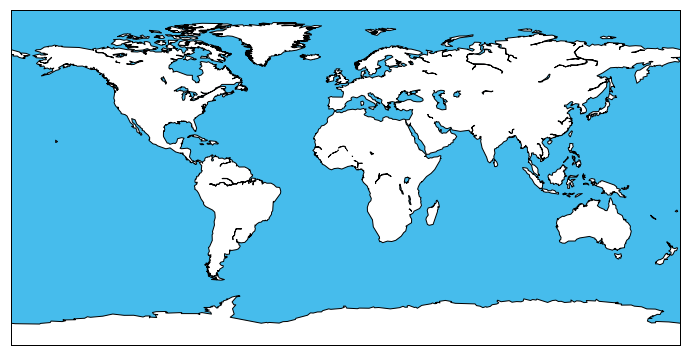

In [16]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
map = Basemap()
map.drawcoastlines()
map.drawmapboundary(fill_color='#46bcec')
map.fillcontinents(color = 'white',lake_color='#46bcec')

x = 26.82
y = -80.78
map.plot(x,y)

/usr/local/lib/python3.4/dist-packages/mpl_toolkits/basemap/__init__.py:1699: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/usr/local/lib/python3.4/dist-packages/mpl_toolkits/basemap/__init__.py:3262: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/local/lib/python3.4/dist-packages/mpl_toolkits/basemap/__init__.py:3271: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


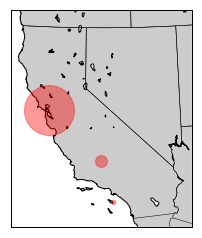

In [17]:
import matplotlib.pyplot as plt
import numpy
from mpl_toolkits.basemap import Basemap

# 1. get data 
lon = [-122.2416355, -122.2977475, -121.204408, -118.3272612, -119.0194639]
lat = [37.7652076, 37.88687, 40.2362738, 33.34221, 35.3738712]
crowd = [8.0, 500.0, 4.0, 44.0, 119.0]

# 2. draw map 

map = Basemap(projection='lcc', resolution='h', 
            lat_0=37.5, lon_0=-119,
            width=1E6, height=1.2E6) 

map.drawcoastlines()
map.drawcountries()
map.drawstates()
map.fillcontinents()
map.drawmapboundary()
x,y = map(lon, lat)   # convert (long-lat) degrees to map coords

for x1, y1, c in zip(x, y, crowd):
    # markersize is scale down by /10
    # need alpha<1 to get some transparency
    # red color is more appropriate
    map.plot(x1, y1, 'ro', markersize=c/10., alpha=0.4)

plt.show()

/usr/local/lib/python3.4/dist-packages/mpl_toolkits/basemap/__init__.py:1699: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/usr/local/lib/python3.4/dist-packages/mpl_toolkits/basemap/__init__.py:3262: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/local/lib/python3.4/dist-packages/mpl_toolkits/basemap/__init__.py:3271: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


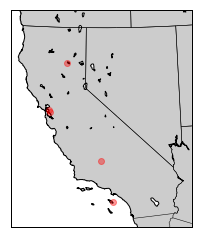

In [19]:
import matplotlib.pyplot as plt
import numpy
from mpl_toolkits.basemap import Basemap

# 1. get data 
lon = [-122.2416355, -122.2977475, -121.204408, -118.3272612, -119.0194639]
lat = [37.7652076, 37.88687, 40.2362738, 33.34221, 35.3738712]
crowd = [8.0, 500.0, 4.0, 44.0, 119.0]

# 2. draw map 

map = Basemap(projection='lcc', resolution='h', 
            lat_0=37.5, lon_0=-119,
            width=1E6, height=1.2E6) 

map.drawcoastlines()
map.drawcountries()
map.drawstates()
map.fillcontinents()
map.drawmapboundary()
x,y = map(lon, lat)   # convert (long-lat) degrees to map coords

for x1, y1, c in zip(x, y, crowd):
    # markersize is scale down by /10
    # need alpha<1 to get some transparency
    # red color is more appropriate
    map.plot(x1, y1, 'ro', markersize=6., alpha=0.4)
plt.savefig('basemap-foo.png')
plt.show()

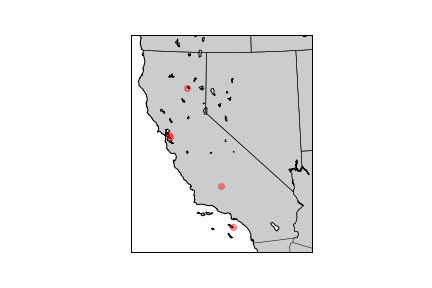

In [20]:
from PIL import Image
im = Image.open('basemap-foo.png')
im

In [21]:
!ls 

basemap-foo.png  GEOS_Data.ipynb	  K3D_Data.png	Storm-Data.ipynb
Basemap.ipynb	 GEOS_Data.png		  K3D.db	Storm-images.ipynb
foo.png		 Geos_Sqlite3_Data.ipynb  pub


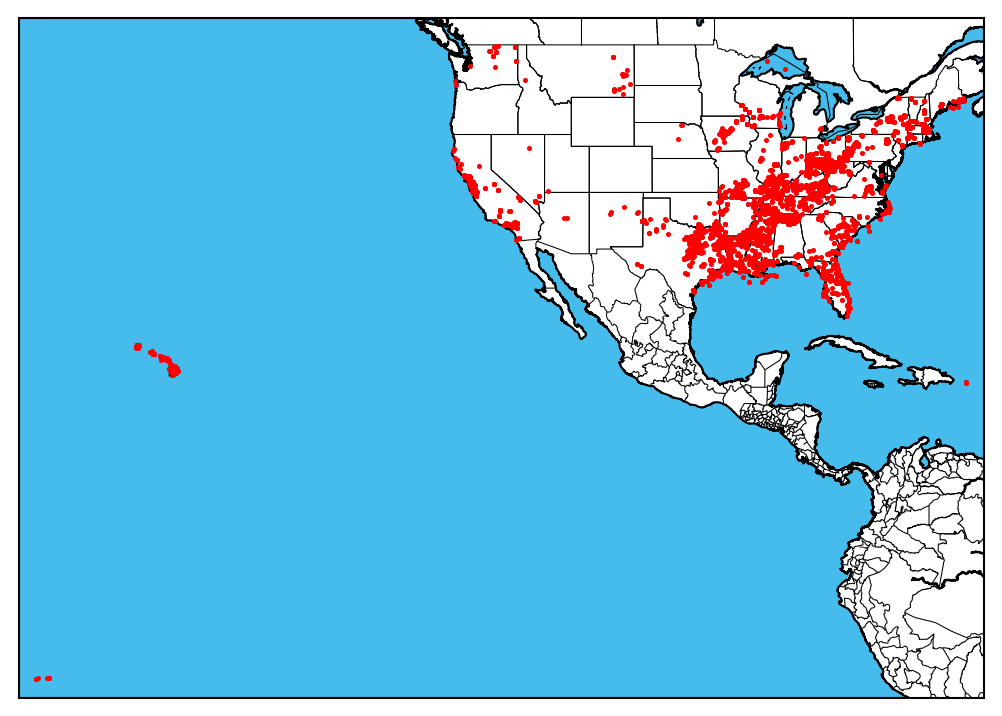

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import pandas as pd
import io
u = open("storm.data", "r").read()

# read in data to use for plotted points
buildingdf = pd.read_csv(io.StringIO(u), delimiter=",")
lat = buildingdf['latitude'].values
lon = buildingdf['longitude'].values

# determine range to print based on min, max lat and lon of the data
margin = 2 # buffer to add to the range
lat_min = min(lat) - margin
lat_max = max(lat) + margin
lon_min = min(lon) - margin
lon_max = max(lon) + margin
plt.figure(figsize=(12,6), dpi = 150)
# create map using BASEMAP
m = Basemap(llcrnrlon=lon_min,
            llcrnrlat=lat_min,
            urcrnrlon=lon_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(lon_max-lon_min)/2,
            projection='merc',
            resolution = 'h',
            area_thresh=10000.,
            )
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color = 'white',lake_color='#46bcec')
# convert lat and lon to map projection coordinates
lons, lats = m(lon, lat)
# plot points as red dots
m.scatter(lons, lats, s = 2, marker = 'o', color='r', zorder=5)
#m.scatter(lons, lats, ".")
plt.savefig('storms.png')

plt.show()

In [18]:
import os
for filename in os.listdir("."):
    if filename.endswith(".png"):
        print (filename)

screenshot.png
d2008_c20180718.data_storms.png
K3D_Data.png
d2017_c20181017.data_storms.png
d2012_c20170519.data_storms.png
storms.png
foo.png


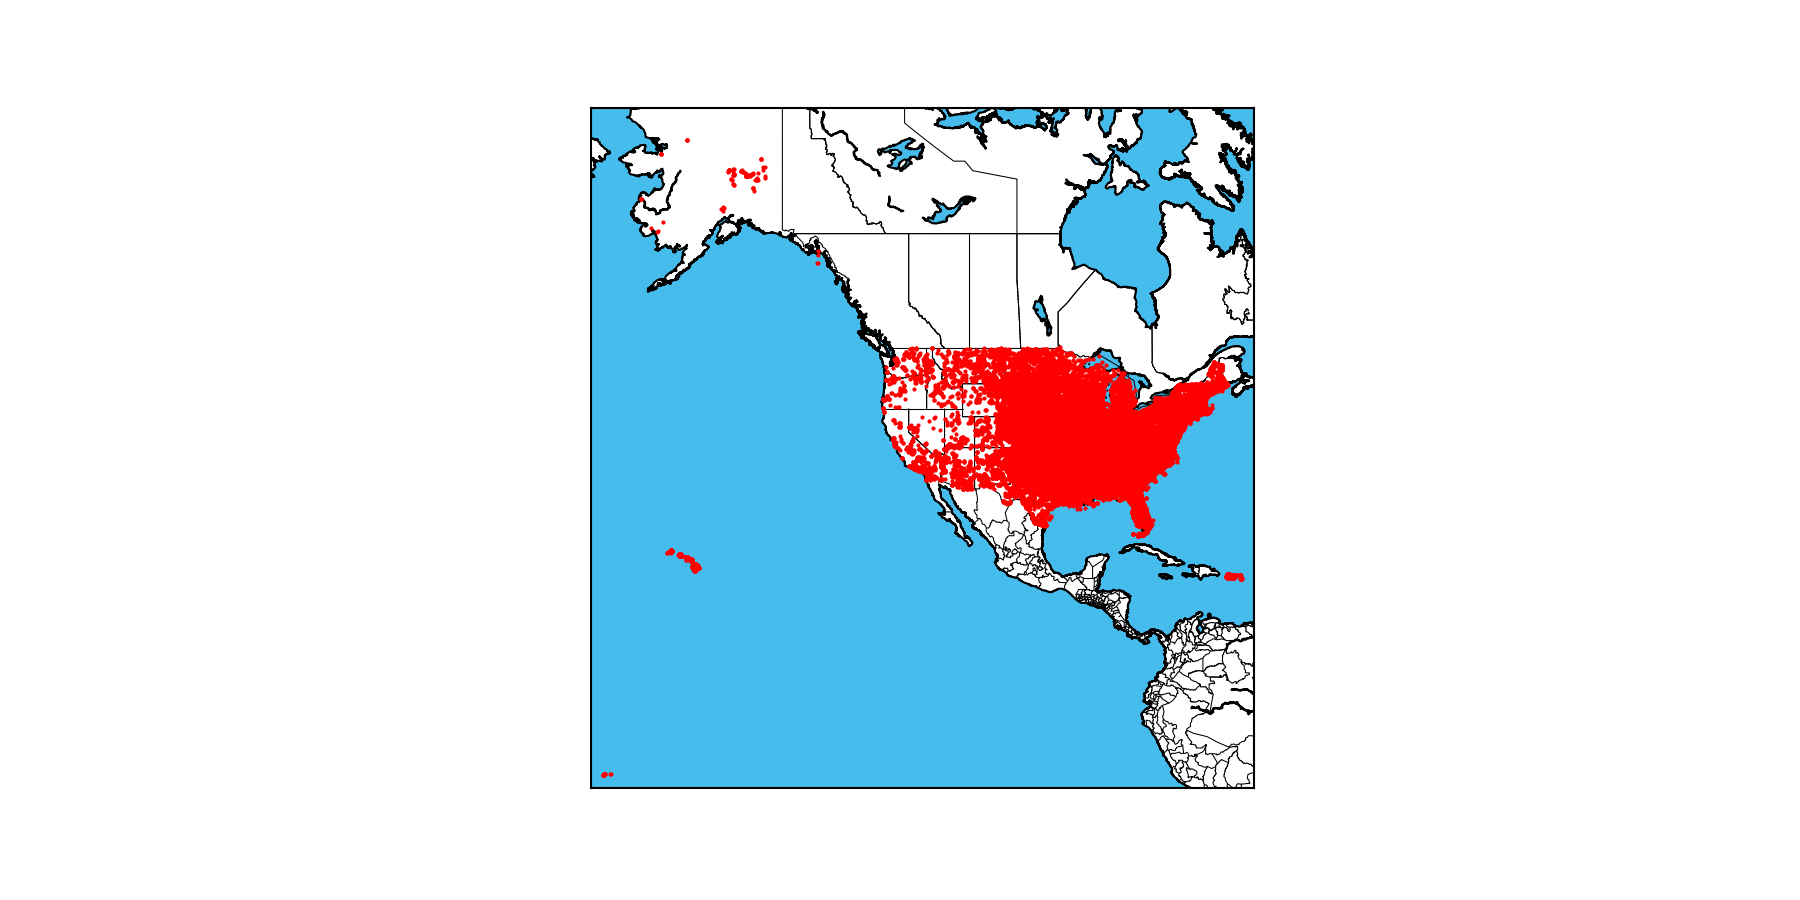

In [15]:
from PIL import Image
im = Image.open("d2008_c20180718.data_storms.png")
im

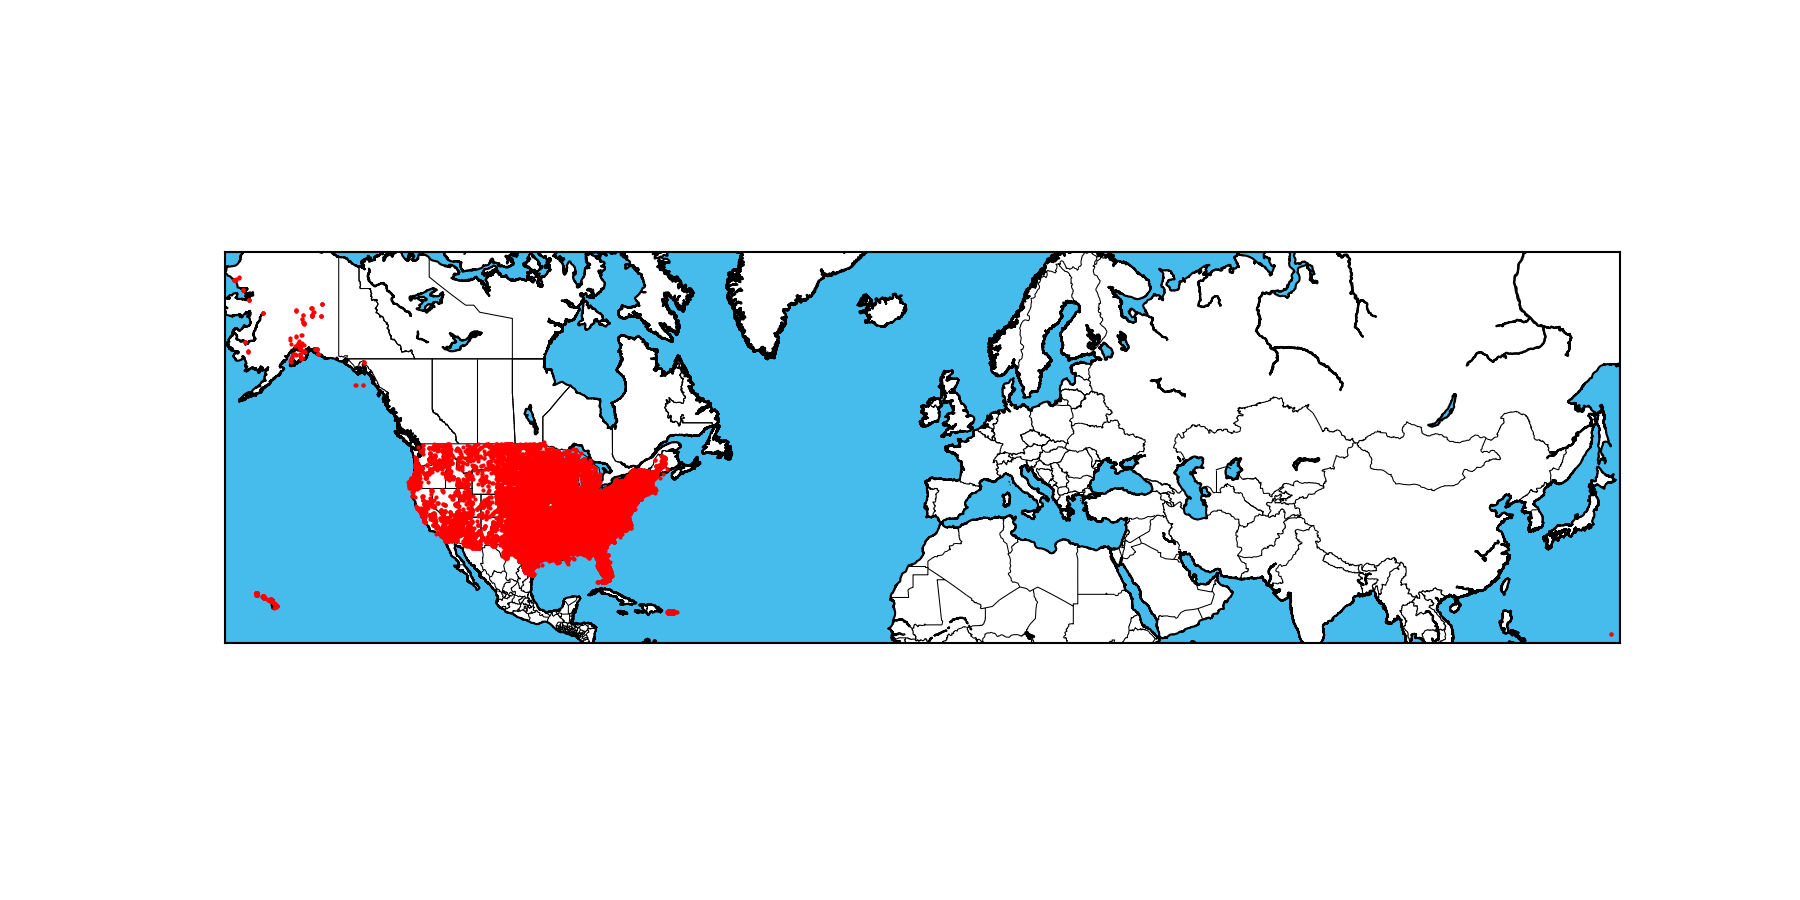

In [17]:
from PIL import Image
im = Image.open("d2012_c20170519.data_storms.png")
im

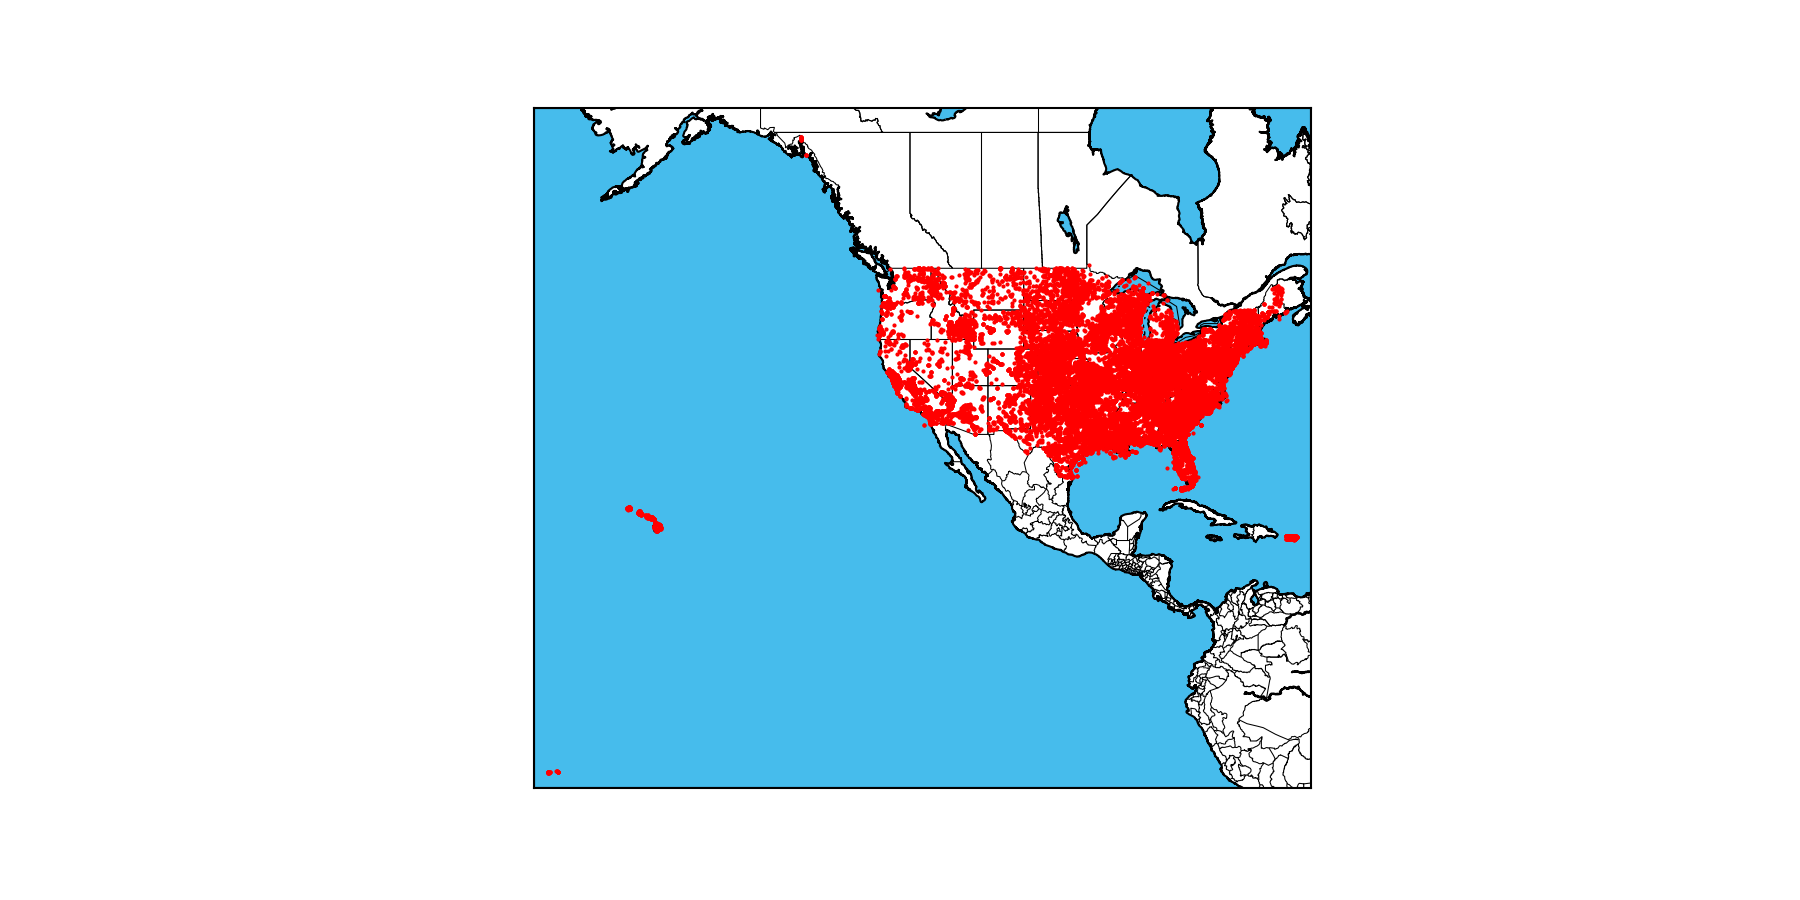

In [19]:
from PIL import Image
im = Image.open("d2017_c20181017.data_storms.png")
im

In [24]:
import os
count = 0
for files in os.listdir("pub/data/swdi/stormevents/csvfiles"):
    count = count +1
    if "StormEvents_locations" in files:
        print (files)
print (count)    


StormEvents_locations-ftp_v1.0_d1954_c20160223.csv
StormEvents_locations-ftp_v1.0_d1958_c20160223.csv
StormEvents_locations-ftp_v1.0_d2000_c20170717.csv
StormEvents_locations-ftp_v1.0_d2005_c20170717.csv
StormEvents_locations-ftp_v1.0_d1976_c20160223.csv
StormEvents_locations-ftp_v1.0_d1965_c20170619.csv
StormEvents_locations-ftp_v1.0_d2006_c20170717.csv
StormEvents_locations-ftp_v1.0_d1977_c20160223.csv
StormEvents_locations-ftp_v1.0_d1993_c20170717.csv
StormEvents_locations-ftp_v1.0_d1955_c20160223.csv
StormEvents_locations-ftp_v1.0_d1981_c20170717.csv
StormEvents_locations-ftp_v1.0_d1995_c20170522.csv
StormEvents_locations-ftp_v1.0_d1982_c20160223.csv
StormEvents_locations-ftp_v1.0_d2015_c20180525.csv
StormEvents_locations-ftp_v1.0_d1983_c20160223.csv
StormEvents_locations-ftp_v1.0_d2001_c20170717.csv
StormEvents_locations-ftp_v1.0_d2016_c20180718.csv
StormEvents_locations-ftp_v1.0_d1953_c20160223.csv
StormEvents_locations-ftp_v1.0_d2014_c20180718.csv
StormEvents_locations-ftp_v1.0_

# How to get STORM EVENTS data

In [ ]:
!wget --mirror --continue --no-host-directories ftp://ftp.ncdc.noaa.gov/pub/data/swdi/stormevents/csvfiles/

--2018-12-05 04:06:19--  ftp://ftp.ncdc.noaa.gov/pub/data/swdi/stormevents/csvfiles/
           => ‘pub/data/swdi/stormevents/csvfiles/.listing’
Resolving ftp.ncdc.noaa.gov (ftp.ncdc.noaa.gov)... 205.167.25.101, 2610:20:8040:2::101
Connecting to ftp.ncdc.noaa.gov (ftp.ncdc.noaa.gov)|205.167.25.101|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /pub/data/swdi/stormevents/csvfiles ... done.
==> PASV ... done.    ==> LIST ... done.

    [  <=>                                  ] 23,100      76.2KB/s   in 0.3s   

2018-12-05 04:06:22 (76.2 KB/s) - ‘pub/data/swdi/stormevents/csvfiles/.listing’ saved [23100]

Remote file no newer than local file ‘pub/data/swdi/stormevents/csvfiles/README’ -- not retrieving.
Remote file no newer than local file ‘pub/data/swdi/stormevents/csvfiles/Storm-Data-Export-Format.docx’ -- not retrieving.
Remote file no newer than local file ‘pub/data/swdi/stormevents/csvfiles/StormEvent

In [ ]:
ftp://ftp.ncdc.noaa.gov/pub/download/
    
ftp://ftp.ncdc.noaa.gov/pub/data/    

In [35]:
count = 0
u = open("d1996_c20170717.data", "r").readlines()
for line in u:
    count = count+1
    if count<5:
        print (Uline)

['33.83,-81.78', '']
['33.83,-81.78', '']
['33.83,-81.78', '']
['33.83,-81.78', '']


In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.basemap import Basemap
#fig = plt.figure(figsize=(12, 12))
plt.figure(figsize=(12,12))

u = open("d1996_c20170717.data", "r").readlines()

# read in data to use for plotted points
buildingdf = pd.read_csv(io.StringIO(u), delimiter=",")
lat = buildingdf['latitude'].values
lon = buildingdf['longitude'].values




m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=8E6, 
            lat_0=45, lon_0=-100,)
m.etopo(scale=0.5, alpha=0.5)



lons, lats = m(lon, lat)
# plot points as red dots
m.scatter(lons, lats, marker = 'o', color='r', zorder=5)


# Map (long, lat) to (x, y) for plotting
#x, y = m(-122.3, 47.6)
#plt.plot(x, y, 'ok', markersize=5)
#plt.text(x, y, ' Seattle', fontsize=12);

TypeError: initial_value must be str or None, not list

<Figure size 1200x1200 with 0 Axes>

In [29]:
!ls

basemap-foo.png				 d2012_c20170519.data
Basemap-GET_STORM_EVENTS_DATA.ipynb	 d2013_c20170519.data
Create-and Test-Geos_Sqlite3_Data.ipynb  d2014_c20180718.data
d1996_c20170717.data			 d2014_c20180718.data_STORM.png
d1997_c20170717.data			 d2015_c20180525.data
d1998_c20170717.data			 d2016_c20180718.data
d1999_c20170717.data			 d2017_c20181017.data
d2000_c20170717.data			 d2018_c20181017.data
d2001_c20170717.data			 d2018_c20181116.data
d2002_c20170717.data			 data.txt
d2003_c20170717.data			 Examining-Datafiles.ipynb
d2004_c20170717.data			 foo.png
d2005_c20170717.data			 GEOS_Data.ipynb
d2006_c20170717.data			 GEOS_Data.png
d2007_c20170717.data			 GEOS.db
d2008_c20180718.data			 K3D_Data.png
d2009_c20180718.data			 pub
d2010_c20170726.data			 Storm-Data.ipynb
d2011_c20180718.data			 Storm-images.ipynb


In [ ]:
import sys
sys.path.insert(0, "/")
from notebooks.GeosData import *

#insert(TEXT)

import os
PATH = "pub/data/swdi/stormevents/csvfiles/"
files = os.listdir(PATH)
for file in sorted(files):
    if "locations" in file:
        print(".", end = "-")
        #print (file)
        count = 0
        view = open(PATH+file).readlines()
        for line in view:
            count = count+1
            line = line.replace("\n", "")
            line = line.split(",")
            if len(line[7])>3:
                #print (line[7],line[8])
                ALL = file+":"+line[0]+":"+line[1]+":"+line[2]+":"+line[3]+":"+line[4]+":"+line[6]+":"+line[6]+":"+line[7]+":"+line[8]+":"+line[9]+":"+line[10]
                insert(ALL)

.-.-.-.-.-

In [45]:
!ls pub/data/swdi/stormevents/csvfiles/StormEvents_locations*

pub/data/swdi/stormevents/csvfiles/StormEvents_locations-ftp_v1.0_d1996_c20170717.csv
pub/data/swdi/stormevents/csvfiles/StormEvents_locations-ftp_v1.0_d1997_c20170717.csv
pub/data/swdi/stormevents/csvfiles/StormEvents_locations-ftp_v1.0_d1998_c20170717.csv
pub/data/swdi/stormevents/csvfiles/StormEvents_locations-ftp_v1.0_d1999_c20170717.csv
pub/data/swdi/stormevents/csvfiles/StormEvents_locations-ftp_v1.0_d2000_c20170717.csv
pub/data/swdi/stormevents/csvfiles/StormEvents_locations-ftp_v1.0_d2001_c20170717.csv
pub/data/swdi/stormevents/csvfiles/StormEvents_locations-ftp_v1.0_d2002_c20170717.csv
pub/data/swdi/stormevents/csvfiles/StormEvents_locations-ftp_v1.0_d2003_c20170717.csv
pub/data/swdi/stormevents/csvfiles/StormEvents_locations-ftp_v1.0_d2004_c20170717.csv
pub/data/swdi/stormevents/csvfiles/StormEvents_locations-ftp_v1.0_d2005_c20170717.csv
pub/data/swdi/stormevents/csvfiles/StormEvents_locations-ftp_v1.0_d2006_c20170717.csv
pub/data/swdi/stormevents/csvfiles/StormEvents_locatio